In [12]:
from torchvision.datasets import DatasetFolder
from torchvision.transforms import transforms as tt
from torch.utils.data import DataLoader
import torch
import os
import numpy as np

In [2]:
train_path = "C:/Users/Yina Gao/Documents/thesis-brain-tumour/test_output/splits/train"
val_path = "C:/Users/Yina Gao/Documents/thesis-brain-tumour/test_output/splits/val"
test_path = "C:/Users/Yina Gao/Documents/thesis-brain-tumour/test_output/splits/test"

In [3]:
## define transforms
transforms = tt.Compose([tt.ToTensor()])

## define some parameters
bs = 1

In [8]:
# define dataset loader
def custom_loader(path):
    return np.load(path)


In [11]:

# Load dataset
train_dataset = DatasetFolder(train_path, loader=custom_loader, transform=transforms, extensions=[".npy"])
# Access class labels
print(train_dataset.classes)
# Create a DataLoader
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)

val_dataset = DatasetFolder(val_path, loader=custom_loader, transform=tt.ToTensor(), extensions=[".npy"])
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=True)
test_dataset = DatasetFolder(test_path, loader=custom_loader, transform=tt.ToTensor(), extensions=[".npy"])
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

['dipg', 'medulloblastoma', 'plgg']


## visualize slices

torch.Size([104, 86, 127]) plgg
torch.Size([19, 512, 512]) medulloblastoma
torch.Size([15, 13, 22]) plgg
torch.Size([12, 70, 70]) dipg
torch.Size([38, 39, 38]) plgg
torch.Size([22, 421, 512]) medulloblastoma
torch.Size([20, 512, 512]) medulloblastoma
torch.Size([39, 33, 37]) plgg
torch.Size([12, 149, 105]) dipg
torch.Size([65, 54, 75]) plgg
torch.Size([9, 106, 108]) dipg
torch.Size([104, 86, 127]) plgg
torch.Size([7, 91, 84]) dipg
torch.Size([53, 59, 56]) plgg
torch.Size([12, 70, 70]) dipg


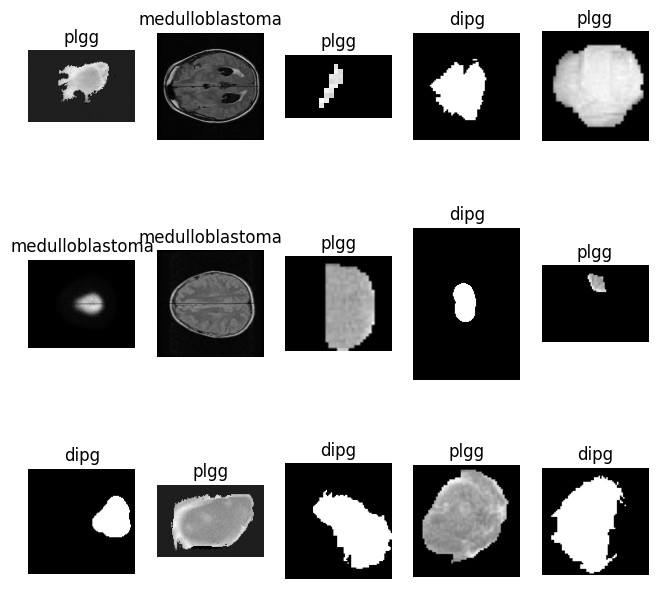

In [19]:
import matplotlib.pyplot as plt
from random import randint

labels_map = {
    0: "dipg",
    1: "medulloblastoma",
    2: "plgg"
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 5, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    tensor, label = train_dataset[sample_idx]
    print(tensor.shape, labels_map[label])
    channels, h, w = tensor.shape
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(tensor[randint(0, channels)-1].squeeze(), cmap="gray")
plt.show()